# .h5 dataset examination

## Why?

To figure out what's inside and in which format.

In [1]:
# Show what's in the directory we are in
!ls -lh ../data/images
!ls -lh ../data/images/raw
!ls -lh ../data/images/depths 
!ls -lh ../data/images/segs 
!ls -lh ../data/images/labels 

итого 20K
drwxrwxr-x 2 ivasiliev ivasiliev 4,0K ноя  2 13:54 depths
drwxrwxr-x 2 ivasiliev ivasiliev 4,0K окт 31 19:34 labeled
drwxrwxr-x 2 ivasiliev ivasiliev 4,0K ноя  5 02:55 labels
drwxrwxr-x 2 ivasiliev ivasiliev 4,0K ноя  5 03:17 raw
drwxrwxr-x 2 ivasiliev ivasiliev 4,0K ноя  6 17:55 segs
итого 744K
-rw-r--r-- 1 ivasiliev ivasiliev 148K окт 31 19:59 curved_paper.jpg
-rw-rw-r-- 1 ivasiliev ivasiliev 210K ноя  2 16:00 garold.jpg
-rw-rw-r-- 1 ivasiliev ivasiliev 383K ноя  5 03:17 paper_1.jpg
итого 2,3M
-rw-rw-r-- 1 ivasiliev ivasiliev 2,3M ноя  6 17:54 depths.h5
итого 2,6M
-rw-rw-r-- 1 ivasiliev ivasiliev 2,6M ноя  6 17:55 segs.h5
итого 5,1M
-rw-rw-r-- 1 ivasiliev ivasiliev 5,1M ноя  6 17:55 labels.h5


In [40]:
import os
import os.path as osp
import h5py
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

from PIL import Image
%matplotlib inline

In [3]:
# Print dataset as a tree
def print_attrs(name, obj):
    print(name)
    for key, val in obj.attrs.items():
        print ("    %s: %s" % (key, val))

## Open dataset and see, what's inside

In [4]:
db_path = osp.abspath('../results/SynthText.h5')
db = h5py.File(db_path,'r')

In [5]:
db.visititems(print_attrs)

data
data/curved_paper.jpg_0
    charBB: [[[210.50445632 218.05777552 228.38759429 236.67634292 249.42746642
   246.37464469 259.58526401 265.16446282 286.17586758 295.32490334
   302.38087387   6.58948357  24.48896085  31.50171656  40.72503732
     7.31634134  19.78876765  29.9432493   39.58646252  47.90453945
   107.06111419 105.32561986 109.51491969 127.83105602 128.26480773
   126.30157898 137.60527444 147.5551825  156.44733904 161.33314074
   167.17626624 174.13858422 179.10336011 184.92969335 197.67380381
   203.42590784 210.47086152 223.96511842 230.4117121  242.69732671
   192.42861949 199.64070928 212.27524051 218.61195436 224.96168696
   231.3244785  240.78282262 250.49161074 256.9070429  259.9400674
   276.23307761 281.67320543 285.82580845 289.97654213]
  [218.74535757 227.0082906  236.67634292 243.60060637 254.32692277
   257.49564073 266.56082618 274.25203119 295.32490334 302.38087387
   309.45277372  20.95144847  32.66251613  41.86789385  52.05475696
    18.56083192  29.

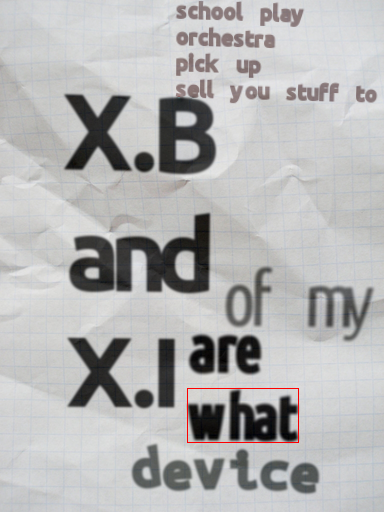

In [51]:
#Image.fromarray(db['data']['garold.jpg_0'][:])
img = db['data']['paper_1.jpg_0'][:]
boxes = db['data']['paper_1.jpg_0'].attrs['wordBB']
boxes = boxes.transpose([2, 1, 0])
rect = boxes[:, [0, 1, 3, 2]][1]
img = cv2.rectangle(img, tuple(rect[0]), tuple(rect[3]), color=(255, 0, 0))
Image.fromarray(img)


In [47]:
path = '/data/synth_data'
box_data = []
for index, img_name in enumerate(list(db['data'])):
    Image.fromarray(db['data'][img_name][:]).save(path + '/images/%05d.jpg' % index)
    boxes = db['data'][img_name].attrs['wordBB']
    boxes = boxes.transpose([2, 1, 0])
    boxes = boxes[:, [0, 1, 3, 2]]
    box_data.append(boxes)

with open(path + '/data.pickle', 'wb') as f:
    pickle.dump(box_data, f)

In [46]:
with open(path + '/data.pickle', 'rb') as f:
    data = pickle.load(f)
data

[array([[[210.50443  , 286.3307   ],
         [276.48532  , 234.03381  ],
         [224.62094  , 304.14093  ],
         [290.60184  , 251.84406  ]],
 
        [[286.1759   , 226.35306  ],
         [312.3885   , 205.57675  ],
         [300.37372  , 244.26581  ],
         [326.5863   , 223.4895   ]],
 
        [[  6.589491 , 484.914    ],
         [ 57.397232 , 443.53345  ],
         [ -1.7204456, 474.71094  ],
         [ 49.087296 , 433.33038  ]],
 
        [[  8.893665 , 466.71655  ],
         [ 63.748947 , 423.49603  ],
         [  1.1987019, 456.95013  ],
         [ 56.05398  , 413.7296   ]],
 
        [[104.925156 , 479.025    ],
         [105.50966  , 503.608    ],
         [119.17476  , 478.6862   ],
         [119.75926  , 503.2692   ]],
 
        [[125.4946   , 478.99692  ],
         [126.625885 , 507.75803  ],
         [137.84268  , 478.5112   ],
         [138.97397  , 507.2723   ]],
 
        [[137.60529  , 234.59085  ],
         [143.79358  , 229.3021   ],
         [144.27179 

## Check the segmentation dataset segs.h5

Dataset attributes:
names
ucms
ucms/brick_wall.jpg
ucms/curved_paper.jpg
ucms/garold.jpg

Names: curved_paper.jpg, garold.jpg, brick_wall.jpg
Image: brick_wall.jpg


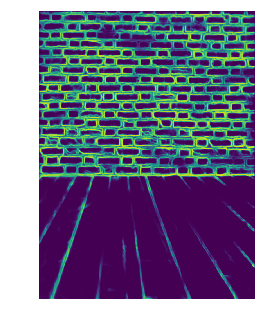

In [10]:
segs_db = h5py.File('../data/images/segs/segs.h5', 'r')
print('Dataset attributes:')
segs_db.visititems(print_attrs)
print('\nNames:', ', '.join([n[0].decode() for n in list(segs_db['names'])]))

# Check the segmentation image
IMAGE = 2
print('Image:', segs_db['names'][IMAGE][0].decode())
pixels = segs_db['ucms'][segs_db['names'][IMAGE, 0]][:] 
fig, ax = plt.subplots()
ax.set_axis_off()
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
im = ax.imshow(pixels)

# SAVE and show the image
# fig.savefig('out_segmented.png', bbox_inches='tight', pad_inches=0)
plt.show()
segs_db.close()

## Check labeled dataset labels.h5

We have passed the dataset `segs.h5` prepared before as an output of `pytorch-hed/run.py` file. Now we want to get labels and areas (and segments) using `SynthText3/prep_scripts/floodFill.py` script. The script takes the dataset described above as input and returns labeled dataset `labels.h5` as output. Let's see, what we have got at the end:

In [9]:
segs_db.close()

Dataset attributes:
mask
mask/brick_wall.jpg
    area: [442444    622   7363      9     25     55      1     28    783  10534
   4932   1216    311      7     22     77    157   7893     19 229874
     20      5    212    473  19418    706   2220     31      5      2
   6307   7592   6121    225    804    263    307   1391    179    762
      1      2    509   4446      2      3   3740   5958   7216  20284
      4      3     28      8     43      3   2110     44   2128     10
      4      3   3558      8      8      4   2168     34    412]
    label: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
mask/garold.jpg
    area: [    37    132     11    390     78   1881     19    285    159      6
     56   1970  32932      2      4      1    298      2    246     75
      2    198    534     87   1132    773     16  23331     16 

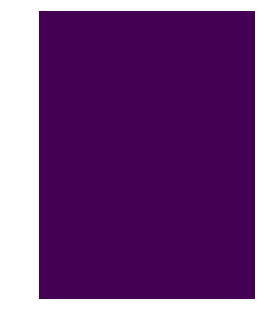

In [21]:
labels_db = h5py.File('../data/images/labels/labels.h5', 'r')
print('Dataset attributes:')
labels_db.visititems(print_attrs)
# print('\nNames:', ', '.join([n[0].decode() for n in list(labels_db['names'])]))

# Check the segmentation image
IMAGE = 'garold.jpg'
# print('Image:', segs_db['names'][IMAGE][0].decode())
pixels = labels_db['mask'][IMAGE][:] 
fig, ax = plt.subplots()
ax.set_axis_off()
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
im = ax.imshow(pixels)

# SAVE and show the image
# fig.savefig('out_segmented.png', bbox_inches='tight', pad_inches=0)
plt.show()
labels_db.close()

In [23]:
!ls ../data

dset.h5  fonts	models	newsgroup


In [4]:
original_dset = h5py.File('../data/dset.h5', 'r')
original_dset.visititems(print_attrs)

depth
depth/curved_paper.jpg
image
image/curved_paper.jpg
seg
seg/curved_paper.jpg
    area: [    37    132     11    390     78   1881     19    285    159      6
     56   1970  32932      2      4      1    298      2    246     75
      2    198    534     87   1132    773     16  23331     16   2300
     10      1    142     56     92    338      2    391 103544     63
  15329      1   4471  13328      4   1021   2035      1     85      2
    974    135      6    525    281   3296    244 153663    897    179
      1    210      4   1522     43      1   1903     83    813    309
     36      4  25951    389      1    124   4987     28     99]
    label: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79]


In [8]:
# Collect everything into one single dataset
out_dset = h5py.File(osp.abspath('../results/curved_paper.h5'), 'w')
out_dset.create_group('depth')
out_dset.create_group('image')
out_dset.create_group('seg')

<HDF5 group "/seg" (0 members)>

In [12]:
list(original_dset['image'].attrs)

[]

In [119]:
# load data from prepared datasets to join them together
depth = np.squeeze(np.load('/home/gayduchenko/data/curved_paper.jpg_depth.npy'))
image = np.asarray(Image.open('/home/gayduchenko/data/curved_paper.jpg'))
segs = h5py.File('/home/gayduchenko/data/curved_paper_labels.h5', 'r')

In [131]:
print(np.isinf(depth).any())
print(np.isnan(depth).any())

False
False


In [121]:
out_dset['depth'].create_dataset('curved_paper.jpg', data=depth)
out_dset['image'].create_dataset('curved_paper.jpg', data=image)
out_dset['seg'].create_dataset('curved_paper.jpg', data=segs['mask/image_0'][:])

<HDF5 dataset "curved_paper.jpg": shape (1022, 766), type "<u2">

In [122]:
for key in segs['mask/image_0'].attrs.keys():
    out_dset['seg/curved_paper.jpg'].attrs[key] = segs['mask/image_0'].attrs[key].copy()

In [123]:
out_dset.visititems(print_attrs)

depth
depth/curved_paper.jpg
image
image/curved_paper.jpg
seg
seg/curved_paper.jpg
    area: [    37    132     11    390     78   1881     19    285    159      6
     56   1970  32932      2      4      1    298      2    246     75
      2    198    534     87   1132    773     16  23331     16   2300
     10      1    142     56     92    338      2    391 103544     63
  15329      1   4471  13328      4   1021   2035      1     85      2
    974    135      6    525    281   3296    244 153663    897    179
      1    210      4   1522     43      1   1903     83    813    309
     36      4  25951    389      1    124   4987     28     99]
    label: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79]


In [124]:
out_dset.close()

# SynthText resulting dataset examination

In [8]:
synth_dset = h5py.File(osp.abspath('../results/SynthText.h5'), 'r')

In [9]:
synth_dset.visititems(print_attrs)

data
data/brick_wall.jpg_0
    txt: [b"put\nthe\nI'm"]
    charBB: [[[106.20791464 121.69841252 137.21460614  96.47908497 108.70566879
   119.71433145  84.87416211  92.79604448  96.06773225]
  [121.69841252 135.81190803 147.86563106 107.80346781 123.15993581
   135.08452364  91.8541766   98.55495337 118.80854071]
  [114.36943561 130.42538983 141.23541755 100.49765982 115.20332505
   129.63772134  84.22531121  95.13033963 113.11048393]
  [ 98.631184   116.14322462 130.42538983  88.99618006 100.49765982
   114.08184751  77.13371679  89.32986756  90.08722045]]

 [[323.85137897 323.96199636 319.42849617 354.57936852 351.54267342
   359.07996326 391.23289835 387.98260107 395.79154036]
  [323.96199636 324.06278059 319.53661397 354.44001865 351.39135646
   358.84368317 390.98726209 387.79071749 394.92016434]
  [347.65579132 341.85895304 341.81174658 377.90202797 377.50349616
   377.1123159  415.32417272 398.80691852 413.8720547 ]
  [347.78207854 341.92132201 341.85895304 378.21372454 377.9020

In [26]:
def show_and_save_image(dset, imname, path):
    pixels = dset[imname][:]
    fig, ax = plt.subplots()
    ax.set_axis_off()
    fig.subplots_adjust(bottom = 0)
    fig.subplots_adjust(top = 1)
    fig.subplots_adjust(right = 1)
    fig.subplots_adjust(left = 0)
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())
    im = ax.imshow(pixels)

    # SAVE and show the image
    import os.path as osp
    fig.savefig(osp.join(path), bbox_inches='tight', pad_inches=0)
    plt.show()  
    return im

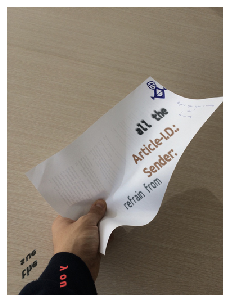

In [27]:
show_and_save_image(synth_dset, 'data/curved_paper.jpg_0', 'curved_paper_synth.png')

In [28]:
synth_dset.close()

In [29]:
!open .